In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler


## ADASYN Random over-sampling Evaluation

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [5]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [6]:
x_AD, y_AD = ADASYN(random_state=42).fit_resample(x, y)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_AD, y_AD, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

## random forest

In [8]:


# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train3, y_train3)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 300,  # Liczba drzew
    'max_depth': 30,        # Maksymalna głębokość drzewa
    'min_samples_split': 6,   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': 2,    # Minimalna liczba próbek wymagana w liściu
    'max_features': 'sqrt'  # Liczba cech do rozważenia przy każdym podziale
}

best_rf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
best_rf.fit(x_train3, y_train3)

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train3)
ypred_test = best_rf.predict(x_test3)

print("Training Results\n")
print(classification_report(y_train3, ypred_train))
print("Test Results\n")
print(classification_report(y_test3, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test3, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(best_rf, x_train3, y_train3, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    163590
           1       0.99      0.97      0.98    162015

    accuracy                           0.98    325605
   macro avg       0.98      0.98      0.98    325605
weighted avg       0.98      0.98      0.98    325605

Test Results

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     54677
           1       0.98      0.96      0.97     53859

    accuracy                           0.97    108536
   macro avg       0.97      0.97      0.97    108536
weighted avg       0.97      0.97      0.97    108536

Confusion Matrix:
 [[53533  1144]
 [ 2382 51477]]


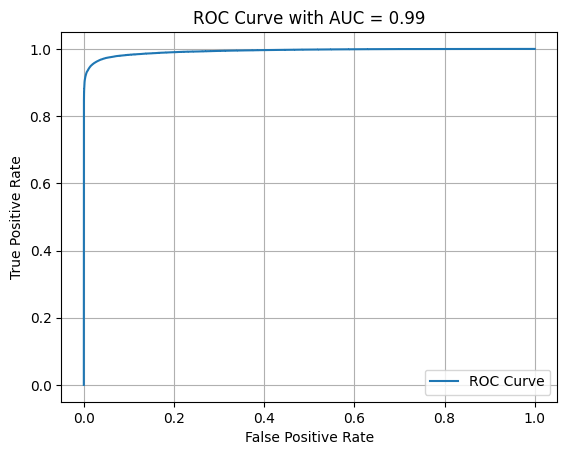

In [9]:

y_proba_test = best_rf.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train3, y_train3)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train3, y_train3)

ypred_train2 = best_tree.predict(x_train3)
ypred_test2 = best_tree.predict(x_test3)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train3, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test3, ypred_test2))

# # Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Najlepsza dokładność: 0.9530320480336604
Training Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    163590
           1       0.99      0.97      0.98    162015

    accuracy                           0.98    325605
   macro avg       0.98      0.98      0.98    325605
weighted avg       0.98      0.98      0.98    325605

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     54677
           1       0.96      0.94      0.95     53859

    accuracy                           0.95    108536
   macro avg       0.95      0.95      0.95    108536
weighted avg       0.95      0.95      0.95    108536



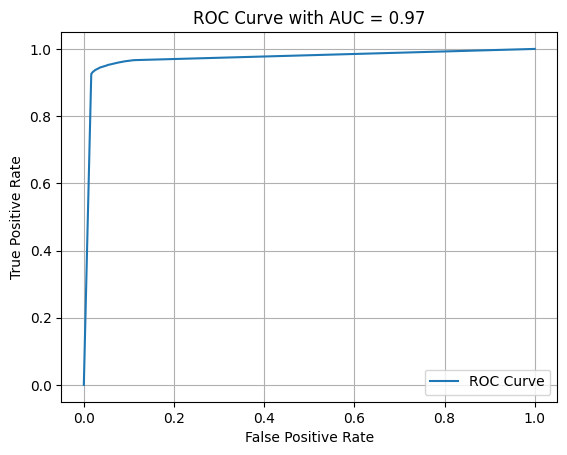

In [11]:

y_proba_test = best_tree.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train3, y_train3)
ypred_train33 = Gnb.predict(x_train3)
y_pred_test33 = Gnb.predict(x_test3)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test3, y_pred_test33))

Naive Bayes Classifier Accuracy:  0.7638295127883836


In [13]:
print('Testing Results\n')
print(classification_report(y_train3, ypred_train33))

Testing Results

              precision    recall  f1-score   support

           0       0.74      0.82      0.78    163590
           1       0.80      0.70      0.75    162015

    accuracy                           0.76    325605
   macro avg       0.77      0.76      0.76    325605
weighted avg       0.77      0.76      0.76    325605



In [14]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test33))

Testing Results

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     54677
           1       0.79      0.71      0.75     53859

    accuracy                           0.76    108536
   macro avg       0.77      0.76      0.76    108536
weighted avg       0.77      0.76      0.76    108536



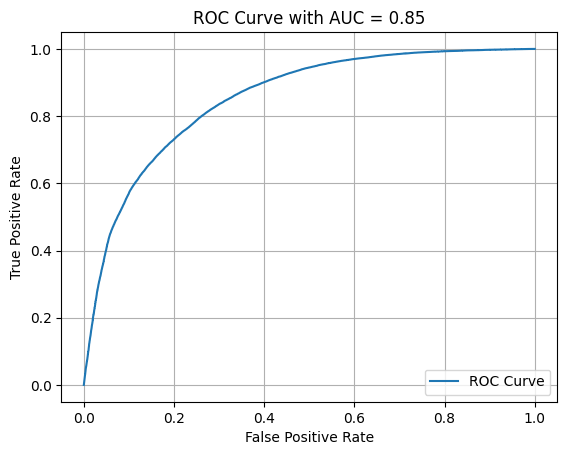

In [15]:
# cross_val_scores = cross_val_score(Gnb, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = Gnb.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Accuracy on Training set:  0.9649513981664901
Accuracy on Test set:  0.9633946340384757

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163590
           1       0.98      0.94      0.96    162015

    accuracy                           0.96    325605
   macro avg       0.97      0.96      0.96    325605
weighted avg       0.97      0.96      0.96    325605

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     54677
           1       0.98      0.94      0.96     53859

    accuracy                           0.96    108536
   macro avg       0.96      0.96      0.96    108536
weighted avg       0.96      0.96      0.96    108536



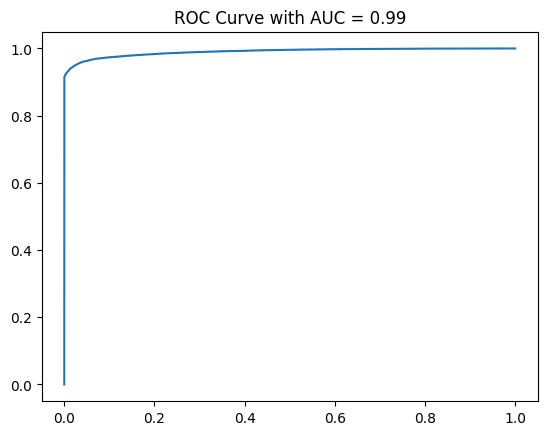

In [16]:

# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train3, y_train3)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train3)
y_pred_test4 = best_xg.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.7957494510219437
Accuracy on Test set:  0.7973391317166655

Training Results

              precision    recall  f1-score   support

           0       0.77      0.85      0.81    163590
           1       0.83      0.74      0.78    162015

    accuracy                           0.80    325605
   macro avg       0.80      0.80      0.80    325605
weighted avg       0.80      0.80      0.80    325605

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     54677
           1       0.83      0.75      0.79     53859

    accuracy                           0.80    108536
   macro avg       0.80      0.80      0.80    108536
weighted avg       0.80      0.80      0.80    108536



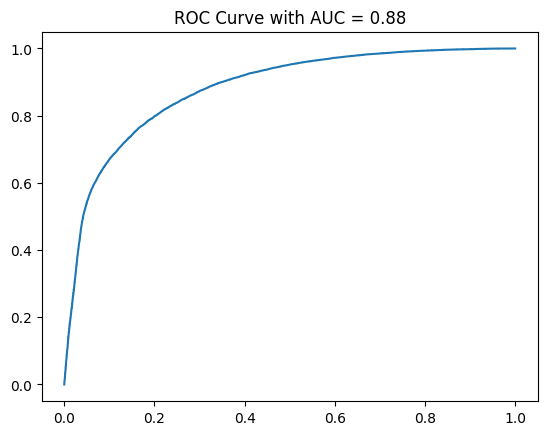

In [17]:

# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train3, y_train3)


# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train3)
y_pred_test4 = best_lg.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.9676110624836842
Accuracy on Test set:  0.9651083511461634

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163590
           1       0.99      0.95      0.97    162015

    accuracy                           0.97    325605
   macro avg       0.97      0.97      0.97    325605
weighted avg       0.97      0.97      0.97    325605

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     54677
           1       0.98      0.95      0.96     53859

    accuracy                           0.97    108536
   macro avg       0.97      0.96      0.97    108536
weighted avg       0.97      0.97      0.97    108536



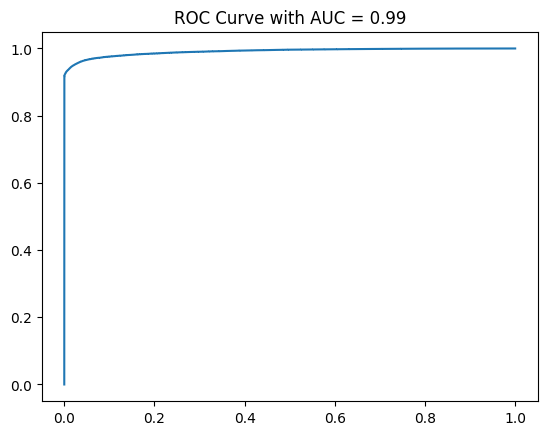

In [18]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'learning_rate': 0.2,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train3, y_train3)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train3)
y_pred_test6 = best_gb.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test6)))
plt.show()

## KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train3, y_train3)

KNeighborsClassifier()

In [20]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)

In [21]:
grid_cv.fit(x_train3, 
            y_train3)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [22]:
grid_cv.best_score_

0.9546542084160128

In [23]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [24]:
ypred_train83 = grid_cv.predict(x_train3)
y_pred_test83 = grid_cv.predict(x_test3)
print("XGBClassifier Accuracy: ",accuracy_score(y_test3, y_pred_test83))

XGBClassifier Accuracy:  0.9597000073708263


In [25]:
print("Training Results\n")
print(classification_report(y_train3, ypred_train83))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    163590
           1       1.00      1.00      1.00    162015

    accuracy                           1.00    325605
   macro avg       1.00      1.00      1.00    325605
weighted avg       1.00      1.00      1.00    325605



In [26]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test83))

Testing Results

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     54677
           1       0.94      0.98      0.96     53859

    accuracy                           0.96    108536
   macro avg       0.96      0.96      0.96    108536
weighted avg       0.96      0.96      0.96    108536



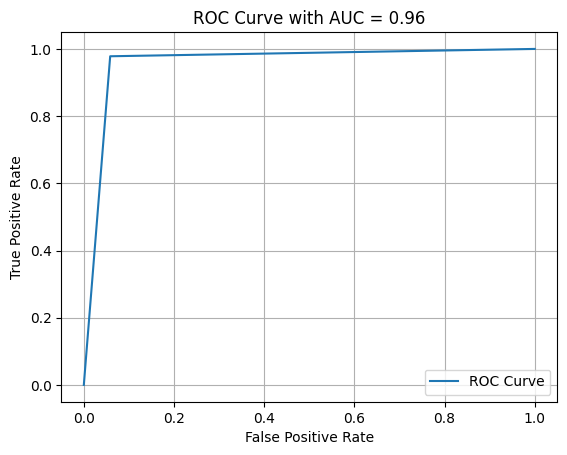

In [27]:
# cross_val_scores = cross_val_score(grid_cv, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = grid_cv.predict_proba(x_test3)[:, 1]

# Obliczanie TPR, FPR i wyznaczanie progów dla krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

# Rysowanie krzywej ROC
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [28]:
ann = tf.keras.models.Sequential()

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [30]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
ann.fit(x_train3, y_train3, batch_size = 32, epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


10176/10176 [==============================] - 17s 2ms/step - loss: 0.4011 - accuracy: 0.8208 - val_loss: 0.3533 - val_accuracy: 0.8497
Epoch 2/100
10176/10176 [==============================] - 15s 2ms/step - loss: 0.3260 - accuracy: 0.8620 - val_loss: 0.2997 - val_accuracy: 0.8737
Epoch 3/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.2969 - accuracy: 0.8756 - val_loss: 0.2797 - val_accuracy: 0.8856
Epoch 4/100
10176/10176 [==============================] - 15s 2ms/step - loss: 0.2813 - accuracy: 0.8835 - val_loss: 0.2671 - val_accuracy: 0.8894
Epoch 5/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2720 - accuracy: 0.8882 - val_loss: 0.2718 - val_accuracy: 0.8861
Epoch 6/100
10176/10176 [==============================] - 15s 2ms/step - loss: 0.2666 - accuracy: 0.8905 - val_loss: 0.2573 - val_accuracy: 0.8934
Epoch 7/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2635 - accuracy: 0.8914 - va

In [35]:
ypred_train1 = ann.predict(x_train3)
y_pred_test1 = ann.predict(x_test3)

y_pred_test1 = (y_pred_test1 > 0.5)
ypred_train1 = (ypred_train1 > 0.5)
print(np.concatenate((y_pred_test1.reshape(len(y_pred_test1),1), y_test3.reshape(len(y_test3),1)),1))

3392/3392 [==============================] - 4s 1ms/step
[[0 0]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


In [36]:
accuracy_score(y_test3, y_pred_test1)

0.9201094567701039

In [37]:
print("Training Results\n")
print(classification_report(y_train3, ypred_train1))

Training Results

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    163590
           1       0.95      0.88      0.91    162015

    accuracy                           0.92    325605
   macro avg       0.92      0.92      0.92    325605
weighted avg       0.92      0.92      0.92    325605



In [38]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test1))

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     54677
           1       0.95      0.88      0.92     53859

    accuracy                           0.92    108536
   macro avg       0.92      0.92      0.92    108536
weighted avg       0.92      0.92      0.92    108536



3392/3392 [==============================] - 3s 1ms/step


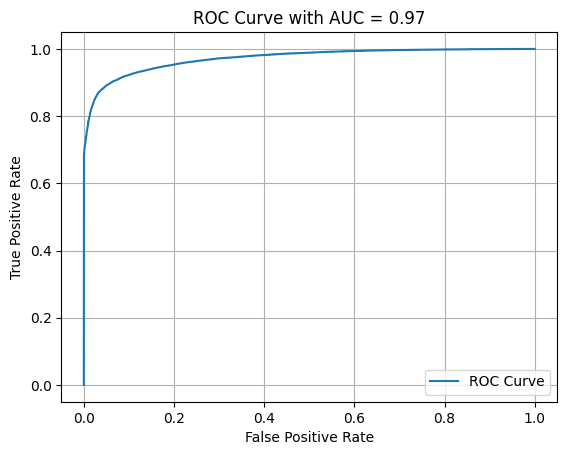

In [39]:
# cross_val_scores = cross_val_score(ann, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = ann.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [40]:

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train3,y_train3,epochs = 100)

Epoch 1/100
10176/10176 [==============================] - 19s 2ms/step - loss: 0.3616 - accuracy: 0.8428
Epoch 2/100
10176/10176 [==============================] - 13s 1ms/step - loss: 0.2752 - accuracy: 0.8889
Epoch 3/100
10176/10176 [==============================] - 14s 1ms/step - loss: 0.2491 - accuracy: 0.9022
Epoch 4/100
10176/10176 [==============================] - 18s 2ms/step - loss: 0.2326 - accuracy: 0.9102
Epoch 5/100
10176/10176 [==============================] - 21s 2ms/step - loss: 0.2220 - accuracy: 0.9144
Epoch 6/100
10176/10176 [==============================] - 14s 1ms/step - loss: 0.2165 - accuracy: 0.9165
Epoch 7/100
10176/10176 [==============================] - 19s 2ms/step - loss: 0.2124 - accuracy: 0.9178
Epoch 8/100
10176/10176 [==============================] - 17s 2ms/step - loss: 0.2082 - accuracy: 0.9197
Epoch 9/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.2055 - accuracy: 0.9203
Epoch 10/100
10176/10176 [====================

In [41]:
model_2.evaluate(x_test3,y_test3)

3392/3392 [==============================] - 4s 1ms/step - loss: 0.1694 - accuracy: 0.9350


[0.1693907529115677, 0.9349985122680664]

In [42]:
ypred_train4 = model_2.predict(x_train3)
y_pred_test4 = model_2.predict(x_test3)

y_pred_test4 = (y_pred_test4 > 0.5)
ypred_train4 = (ypred_train4 > 0.5)

print("Training Results\n")
print(classification_report(y_train3,ypred_train4))
print("Testing Results\n")
print(classification_report(y_test3,y_pred_test4))

3392/3392 [==============================] - 4s 1ms/step
Training Results

              precision    recall  f1-score   support

           0       0.91      0.97      0.94    163590
           1       0.97      0.90      0.93    162015

    accuracy                           0.93    325605
   macro avg       0.94      0.93      0.93    325605
weighted avg       0.94      0.93      0.93    325605

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     54677
           1       0.97      0.90      0.93     53859

    accuracy                           0.93    108536
   macro avg       0.94      0.93      0.93    108536
weighted avg       0.94      0.93      0.93    108536



3392/3392 [==============================] - 4s 1ms/step


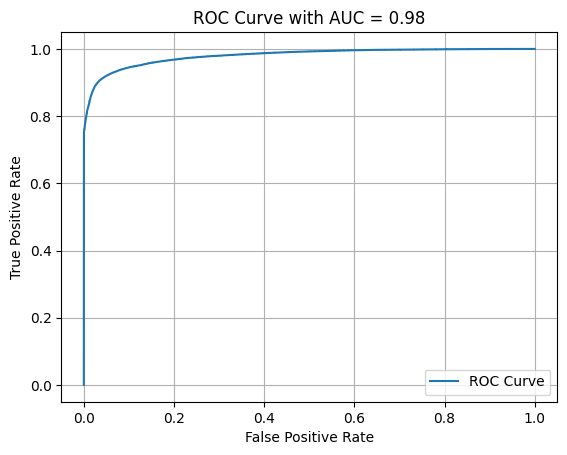

In [43]:
# cross_val_scores = cross_val_score(model_2, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_2.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [44]:

tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train3,y_train3,epochs = 100)

Epoch 1/100
10176/10176 [==============================] - 18s 2ms/step - loss: 0.3398 - accuracy: 0.8542
Epoch 2/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2637 - accuracy: 0.8936
Epoch 3/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2437 - accuracy: 0.9029
Epoch 4/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2311 - accuracy: 0.9085
Epoch 5/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2227 - accuracy: 0.9123
Epoch 6/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2162 - accuracy: 0.9153
Epoch 7/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2121 - accuracy: 0.9172
Epoch 8/100
10176/10176 [==============================] - 17s 2ms/step - loss: 0.2083 - accuracy: 0.9185
Epoch 9/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.2051 - accuracy: 0.9199
Epoch 10/100
10176/10176 [====================

In [45]:
model_22.evaluate(x_test3,y_test3)

3392/3392 [==============================] - 4s 1ms/step - loss: 0.1629 - accuracy: 0.9378


[0.16292396187782288, 0.9377625584602356]

In [46]:
ypred_train22 = model_22.predict(x_train3)
y_pred_test22 = model_22.predict(x_test3)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train3,ypred_train22))
print(classification_report(y_test3,y_pred_test22))

3392/3392 [==============================] - 3s 956us/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    163590
           1       0.97      0.91      0.93    162015

    accuracy                           0.94    325605
   macro avg       0.94      0.94      0.94    325605
weighted avg       0.94      0.94      0.94    325605

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     54677
           1       0.97      0.91      0.94     53859

    accuracy                           0.94    108536
   macro avg       0.94      0.94      0.94    108536
weighted avg       0.94      0.94      0.94    108536



   1/3392 [..............................] - ETA: 1:09

3392/3392 [==============================] - 3s 970us/step


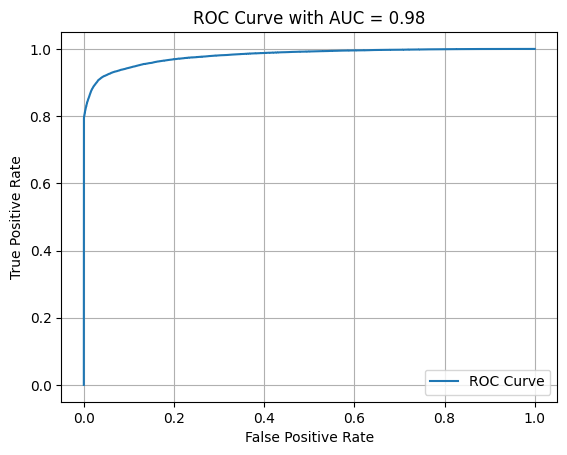

In [47]:
# cross_val_scores = cross_val_score(model_22, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_22.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [48]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model.fit(x=x_train3, 
          y=y_train3, 
          epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
10176/10176 [==============================] - 16s 2ms/step - loss: 0.4756 - val_loss: 0.3769
Epoch 2/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4239 - val_loss: 0.3635
Epoch 3/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4133 - val_loss: 0.3553
Epoch 4/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4105 - val_loss: 0.3538
Epoch 5/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4085 - val_loss: 0.3538
Epoch 6/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4074 - val_loss: 0.3514
Epoch 7/100
10176/10176 [==============================] - 15s 2ms/step - loss: 0.4068 - val_loss: 0.3532
Epoch 8/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4057 - val_loss: 0.3474
Epoch 9/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.4050 - val_loss: 0.3490
Epoch 10/100
10176/10176 [====================

In [50]:
ypred_train5 = model.predict(x_train3)
y_pred_test5 = model.predict(x_test3)

y_pred_test5 = (y_pred_test5 > 0.5)
ypred_train5 = (ypred_train5 > 0.5)

print(classification_report(y_train3,ypred_train5))
print(classification_report(y_test3,y_pred_test5))

3392/3392 [==============================] - 3s 883us/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86    163590
           1       0.87      0.83      0.85    162015

    accuracy                           0.85    325605
   macro avg       0.86      0.85      0.85    325605
weighted avg       0.86      0.85      0.85    325605

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     54677
           1       0.87      0.84      0.85     53859

    accuracy                           0.86    108536
   macro avg       0.86      0.86      0.86    108536
weighted avg       0.86      0.86      0.86    108536



   1/3392 [..............................] - ETA: 1:08

3392/3392 [==============================] - 3s 957us/step


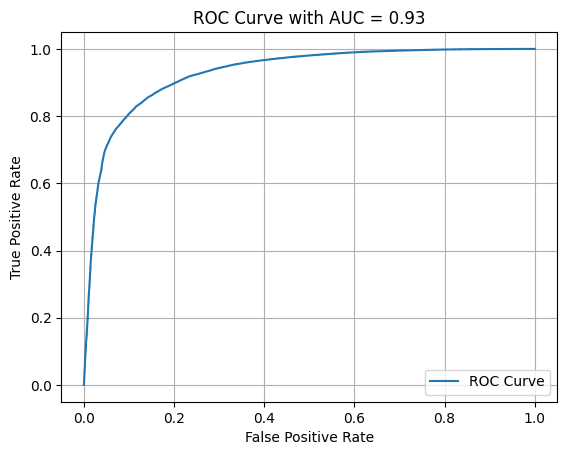

In [51]:
# cross_val_scores = cross_val_score(model, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:
model1 = Sequential()



model1.add(Dense(20,  activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model1.fit(x=x_train3, 
          y=y_train3, 
          epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


10176/10176 [==============================] - 16s 2ms/step - loss: 0.4326 - val_loss: 0.3664
Epoch 2/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3849 - val_loss: 0.3405
Epoch 3/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3703 - val_loss: 0.3294
Epoch 4/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3621 - val_loss: 0.3162
Epoch 5/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3565 - val_loss: 0.3174
Epoch 6/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3531 - val_loss: 0.3090
Epoch 7/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3498 - val_loss: 0.3051
Epoch 8/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3481 - val_loss: 0.3034
Epoch 9/100
10176/10176 [==============================] - 15s 1ms/step - loss: 0.3467 - val_loss: 0.3025
Epoch 10/100
10176/10176 [==============================] 

In [54]:
ypred_train7 = model1.predict(x_train3)
y_pred_test7 = model1.predict(x_test3)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)

print(classification_report(y_train3,ypred_train7))
print(classification_report(y_test3,y_pred_test7))

3392/3392 [==============================] - 3s 952us/step
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    163590
           1       0.93      0.82      0.87    162015

    accuracy                           0.88    325605
   macro avg       0.89      0.88      0.88    325605
weighted avg       0.89      0.88      0.88    325605

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     54677
           1       0.93      0.83      0.88     53859

    accuracy                           0.88    108536
   macro avg       0.89      0.88      0.88    108536
weighted avg       0.89      0.88      0.88    108536



   1/3392 [..............................] - ETA: 1:05

3392/3392 [==============================] - 3s 1ms/step


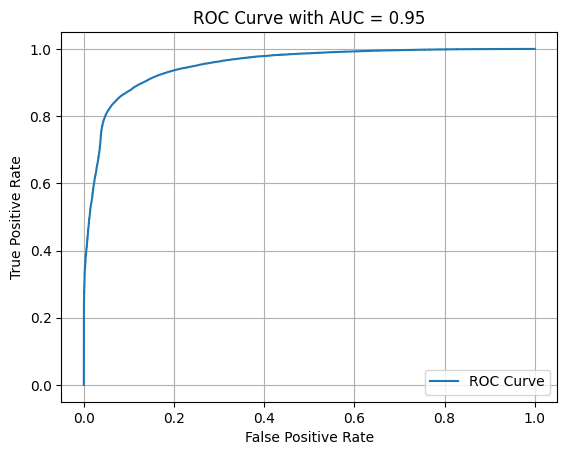

In [55]:
# cross_val_scores = cross_val_score(model1, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model1.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [56]:
# model3 = SVC(probability=True)

In [57]:
# model3.fit(x_train3,y_train3)

In [58]:
# ypred_train9 = model3.predict(x_train3)
# y_pred_test9 = model3.predict(x_test3)


# print(classification_report(y_train3,ypred_train9))
# print(classification_report(y_test3,y_pred_test9))

In [59]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
# grid.fit(x_train3,y_train3)

In [61]:
# grid.best_params_

In [62]:
# grid.best_estimator_

In [63]:
# ypred_train = grid.predict(x_train3)
# y_pred_test = grid.predict(x_test3)


# print(classification_report(y_train3,ypred_train))
# print(classification_report(y_test3,y_pred_test))

In [64]:

# y_proba_test = grid.predict_proba(x_test3)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.87      0.96      0.91    163590
           1       0.95      0.86      0.90    162015

    accuracy                           0.91    325605
   macro avg       0.91      0.91      0.91    325605
weighted avg       0.91      0.91      0.91    325605

Testing Results

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     54677
           1       0.95      0.86      0.90     53859

    accuracy                           0.91    108536
   macro avg       0.91      0.91      0.91    108536
weighted avg       0.91      0.91      0.91    108536



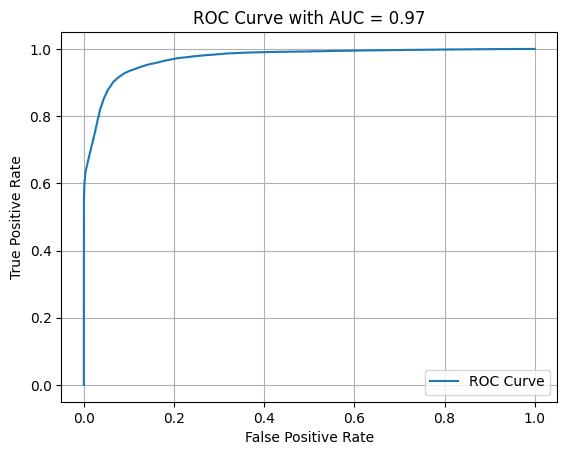

In [65]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train3, y_train3)

ypred_train14 = model3.predict(x_train3)
y_pred_test14 = model3.predict(x_test3)

print("Training Results\n")
print(classification_report(y_train3, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test3, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()